# This is the template for the report to submit for the Assignment in ITNPBD2 Autumn 2022

## Follow these instructions:
- Save this file in the form: __ZZZZZZZ_ITNPBD2_Autumn22_TheAssignment.ipynb__ where __ZZZZZZZ__ is your student number
- Fill in the report 
 * Use a mix of code and markdown cells to tell a story, only the *Executive Summary* should be contained in a single markdown cell
 * all other sections should have more than one (1) cells and outputs, where you explain what you are doing and why.
- When you are finished then ...
 * Save the file
 * Restart the Kernel and re-run the whole notebook. "Kernel" -> "Restart & Run" in the menu at top
 * Make sure everything has executed as expected. If cells run with error that you want to keep to show your attempt, then manually run every cell below the buggy one to show the output.
 * Make sure no __Markdown__ cell is in *edit* mode
 * Save file again
 * __Download this notebook as HTML__, you do that under *File->Download as-> HTML*
   + make sure to use the same name format, just different extension
 * __Upload the html file__ to the assessment on Canvas and submit

## Executive Summary
Write a short (200 words max) summary of what the report contains and what you have discovered.

## Data Cleaning and Preparations
In this section you should demonstrate how you have programmatically loaded the dataset (or those parts of it you intend to use) into memory, and cleaned and prepared it.
Explain the steps you take.

In [ ]:
import os

folderPath = r"D:\Python\Assignment\dataset" # Path to the folder with your files
text_files = [] # List of the files you want to use
def myFilesAddEmptyLine(): # Function to add an empty line after each line in the file
    for file in os.listdir(folderPath): # Loop through the files in the folder
        if file.endswith(".txt"): # Check if the file is a text file
            text_files.append(file) # Add the file to the list
    return text_files # Return the list of text files
text_files = myFilesAddEmptyLine()  # Call the function
print(text_files)  # Print the list of text files

In [2]:
import glob # Import the glob module
import re  # Import the re module
import pandas as pd # Import the pandas module as pd if want to install pandas use pip install pandas
import matplotlib.pyplot as plt    # Import the matplotlib.pyplot module as plt if want to install matplotlib.pyplot use pip install matplotlib
import seaborn as sns # Import the seaborn module as sns if want to install seaborn use pip install seaborn
import numpy as np 
from sklearn import linear_model # Import the linear_model module from sklearn
lm = linear_model.LinearRegression() # Create a linear regression object
files = glob.glob(r'D:\Python\Assignment\dataset\*.txt') # Path to the folder with your files

In [3]:
#initilizing lists
title = []
author = []
release_date = []
last_updated = []
language = []
ebook = []
character_set_encoding = []
chapter_count = []
section_count = []
lines_count = []
total_number_of_words = []

#creating dictionary
books = {'title':title, 'author':author, 'release_date':release_date, 'last_updated':last_updated, 'language':language, 'ebook':ebook, 'character_set_encoding':character_set_encoding, 'chapter_count':chapter_count, 'section_count':section_count, 'lines_count':lines_count, 'number_of_words':total_number_of_words}
i = 0
#reading files
for file in files:
    with open(file) as s:
        lines = len(s.readlines())
        lines_count.append(lines)

    number_of_words = 0
 
    #read number of words in file
    with open(file) as m:
        data = m.read()
        lines = data.split()
        number_of_words += len(lines)
        total_number_of_words.append(number_of_words)

    #read other attributes
    with open(file) as f:
        data = f.read()

        #searching for title
        title_match = re.search(r"Title: (.*)", data)
        if title_match is None: #if title is not found
            title.append(None) #append None
        else: #if title is found
            title.append(title_match.group(1))#append title

        #searching for author
        author_match = re.search(r"Author: (.*)", data)
        if author_match is None:
            author.append('Anonmous')
        else:
            author.append(author_match.group(1))
        
        #searching for release date
        release_date_match = re.search(r"Release Date: (.\w+ \d+, \d+)", data)
        if release_date_match is None:
            release_date.append(None)
        else:
            release_date.append(release_date_match.group(1))

        #searching for last updated date
        last_updated_match = re.search(r"\[Date last updated: (.*)\]", data)
        if last_updated_match is None:
            last_updated.append(release_date_match.group(1))
        else:
            last_updated.append(last_updated_match.group(1))

        #searching for language
        language_match = re.search(r"Language: (.*)", data)
        if language_match is None:
            language.append(None)
        else:
            language.append(language_match.group(1))

        #searching for ebook number
        ebook_match = re.search(r"EBook #(.\d*)", data)
        if ebook_match is None:
            ebook.append(text_files[i][0:5])
        else:
            ebook.append(ebook_match.group(1))
        
        #searching for character set encoding
        character_set_encoding_match = re.search(r"Character set encoding: (.*)", data)
        if character_set_encoding_match is None: #if character set encoding is not found
            character_set_encoding.append('ASCII')#append ASCII if value is not found
        else: #if character set encoding is found
            character_set_encoding.append(character_set_encoding_match.group(1))#append character set encoding
        
        #searching for chapter count
        chapter_count_match = re.findall(r"CHAPTER", data)
        if chapter_count_match is None:
            chapter_count.append(None)
        else:
            chapter_count.append(len(chapter_count_match))
        
        #searching for section count
        section_count_match = re.findall(r"\bSection \d+\.", data)
        num_sections = len(section_count_match)#number of sections
        if num_sections is None:
            section_count.append(None)
        else:
            section_count.append(len(section_count_match))
    i+= 1        

In [4]:
#creating dataframe
df = pd.DataFrame(books)
#converting release date and last updated to datetime
df.release_date
df['publish_year'] = pd.DatetimeIndex(df['release_date']).year #creating publish year column

In [5]:
df.head() #displaying first 5 rows

,title,author,release_date,last_updated,language,ebook,character_set_encoding,chapter_count,section_count,lines_count,number_of_words,publish_year
0,Apocolocyntosis,Lucius Seneca,"November 10, 2003","April 9, 2005",English,10001,ASCII,0,4,958,8807,2003
1,The House on the Borderland,William Hope Hodgson,"November 10, 2003","November 10, 2003",English,10002,ASCII,0,4,5690,54201,2003
2,"My First Years As A Frenchwoman, 1876-1879",Mary King Waddington,"November 10, 2003","November 10, 2003",English,10003,ASCII,0,4,6327,64594,2003
3,The Warriors,"Lindsay, Anna Robertson Brown","November 10, 2003","November 10, 2003",English,10004,ASCII,0,4,5361,51300,2003
4,A Voyage to the Moon,George Tucker,"November 7, 2003","November 7, 2003",English,10005,ASCII,34,4,7313,73656,2003


In [6]:
df.tail() #displaying last 5 rows

,title,author,release_date,last_updated,language,ebook,character_set_encoding,chapter_count,section_count,lines_count,number_of_words,publish_year
1171,Two Thousand Miles On An Automobile,Arthur Jerome Eddy,"May 18, 2004","May 18, 2004",English,12380,ASCII,19,4,9379,82181,2004
1172,The Auchensaugh Renovation of the National Cov...,The Reformed Presbytery,"May 19, 2004","May 19, 2004",English,12381,ASCII,0,4,5456,56619,2004
1173,"The Poetical Works of William Wordsworth, Vol....",William Wordsworth,"May 19, 2004","May 19, 2004",English,12383,ASCII,0,4,20247,126872,2004
1174,The Italians,Frances Elliot,"May 19, 2004","May 19, 2004",English,12385,US-ASCII,39,4,14015,119266,2004
1175,Samantha at the St. Louis Exposition,Marietta Holley,"May 19, 2004","May 19, 2004",English,12386,US-ASCII,16,4,7972,76744,2004


In [7]:
df.to_csv('books.csv', index=False) #saving dataframe to csv file

In [8]:
df = pd.read_csv('books.csv', index_col=False) #reading csv file

## Exploratory Data Analysis
Programmatically explore the dataset. Tell the reader, how the dataset looks like and at least three most interesting observations that you can learn from the data. Propose at least three (3) questions to ask with the dataset.

In [9]:
df.info() #displaying information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   1176 non-null   object
 1   author                  1176 non-null   object
 2   release_date            1176 non-null   object
 3   last_updated            1176 non-null   object
 4   language                1176 non-null   object
 5   ebook                   1176 non-null   int64 
 6   character_set_encoding  1176 non-null   object
 7   chapter_count           1176 non-null   int64 
 8   section_count           1176 non-null   int64 
 9   lines_count             1176 non-null   int64 
 10  number_of_words         1176 non-null   int64 
 11  publish_year            1176 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 110.4+ KB


In [10]:
df.describe() #displaying summary statistics

,ebook,chapter_count,section_count,lines_count,number_of_words,publish_year
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,10823.529762,8.573980,4.139456,6984.573980,61347.671769,2003.729592
std,459.490794,15.396036,2.895797,6635.326361,60601.823971,0.618860
min,10001.000000,0.000000,4.000000,440.000000,3343.000000,2003.000000
25%,10476.750000,0.000000,4.000000,2297.500000,17147.750000,2003.000000
50%,10837.500000,0.000000,4.000000,5613.500000,48178.500000,2004.000000
75%,11181.250000,14.000000,4.000000,9497.000000,87069.500000,2004.000000
max,12386.000000,144.000000,84.000000,103540.000000,984066.000000,2013.000000


In [11]:
df.isna().sum() #displaying number of missing values

title                     0
author                    0
release_date              0
last_updated              0
language                  0
ebook                     0
character_set_encoding    0
chapter_count             0
section_count             0
lines_count               0
number_of_words           0
publish_year              0
dtype: int64

In [12]:
df[['author']].value_counts().to_frame() #displaying number of books per author

,0
author,
Various,200
W.W. Jacobs,52
Roger McGuinn,30
Anonymous,30
John Lord,14
...,...
George Biddell Airy,1
George Eliot,1
George Frisbie Whicher,1


In [13]:
df['character_set_encoding'].unique() #displaying unique character set encodings

array(['ASCII', 'US-ASCII', 'ISO Latin-1', 'ISO-8859-1',
       'US-ASCII, MIDI, Lilypond, MP3 and TeX', 'UTF-8'], dtype=object)

In [14]:
df[['character_set_encoding']].value_counts().to_frame() #displaying number of books per character set encoding

,0
character_set_encoding,
ASCII,852
US-ASCII,315
ISO Latin-1,5
ISO-8859-1,2
"US-ASCII, MIDI, Lilypond, MP3 and TeX",1
UTF-8,1


In [15]:
df['title'].duplicated().sum() #displaying number of duplicate titles

90

## Descriptive Analytics
Interogate the dataset with descriptive analytics. Answer the three (3) questions that you found interesting in the previous section using descriptive analytics. Make each question a subsection of this section and follow the steps: 1. the question, 2. justify why it is interesting 3. the answer.

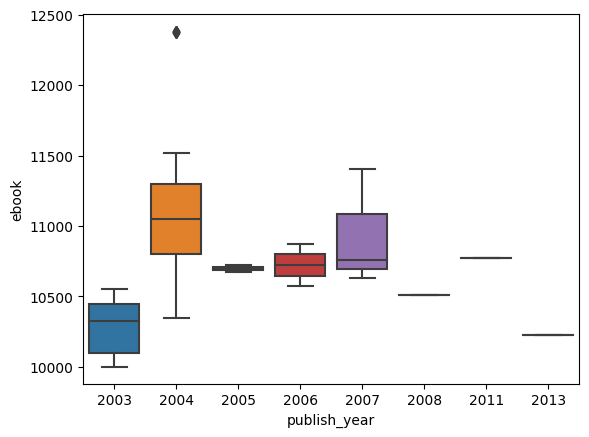

In [16]:
sns.boxplot(y=df["ebook"],x=df["publish_year"]); #plotting boxplot of publish year vs ebook number
plt.show()

C:\Users\Faisal\AppData\Local\Temp\ipykernel_16064\425905036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

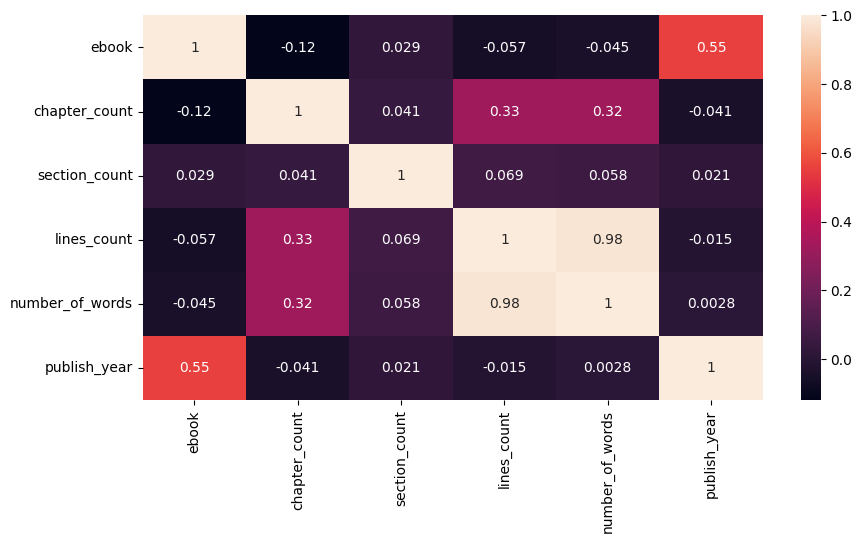

In [17]:
plt.figure(figsize=(10,5)) #setting figure size
sns.heatmap(df.corr(), annot=True) #plotting heatmap of correlation matrix

<AxesSubplot: title={'center': 'which year book published most'}>

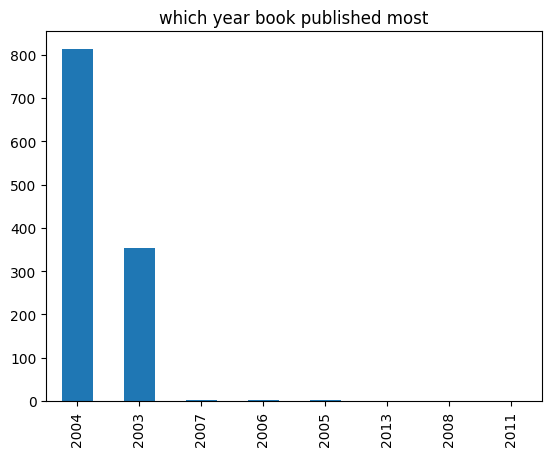

In [18]:
publi= pd.value_counts(df['publish_year']) #counting number of books published per year
publi.plot.bar(title='which year book published most') #plotting bar chart of number of books published per year

<AxesSubplot: title={'center': 'which author have more books'}>

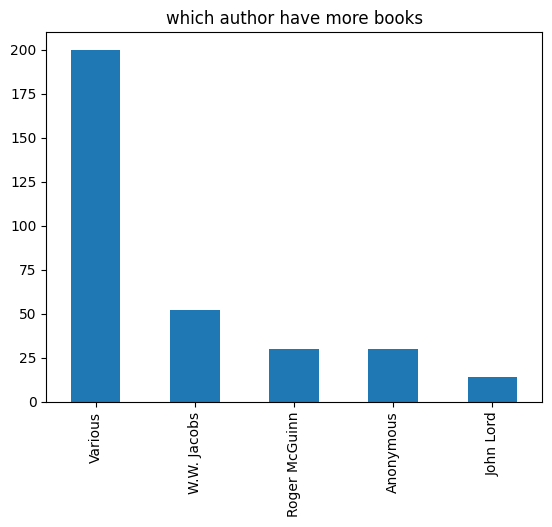

In [19]:
publi= pd.value_counts(df['author']).head() #counting number of books per author
publi.plot.bar(title='which author have more books')

## Suggestions
Suggest further steps to enrich the dataset with additional (external) data, or apply some additional advanced modelling or analysis. You do not have to fully implement your suggestions, but you will have to explain and justify your suggestions.

## Bibliography
List all sources you have utilised in the making of this report here in this single markdown cell.